In [153]:
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler

In [154]:
df=pd.read_csv("k_clusters.csv")
df.head()

,Name,Age,Income
0,James,27,70000
1,Hopper,29,90000
2,Carter,29,61000
3,Mcdonald,28,60000
4,Justin,42,150000


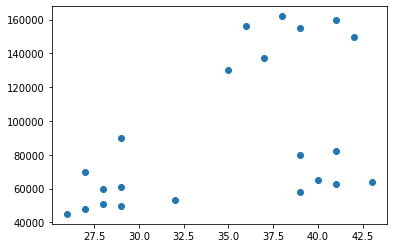

In [155]:
plt.scatter(df.Age,df.Income)

In [156]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [157]:
predicted=km.fit_predict(df[["Age","Income"]])
predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [158]:
df["Cluster"]=predicted
df.head()

,Name,Age,Income,Cluster
0,James,27,70000,0
1,Hopper,29,90000,0
2,Carter,29,61000,2
3,Mcdonald,28,60000,2
4,Justin,42,150000,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


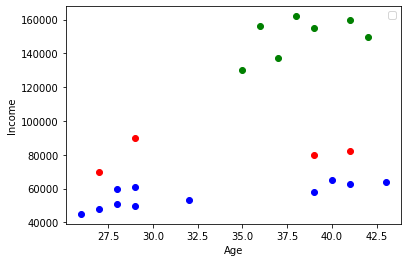

In [159]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]

plt.scatter(df1["Age"],df1["Income"],color="red")
plt.scatter(df2["Age"],df2["Income"],color="green")
plt.scatter(df3["Age"],df3["Income"],color="blue")

plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()



In [160]:
scaler=MinMaxScaler()
scaler.fit(df[["Income"]])
df["Income"]=scaler.transform(df[["Income"]])

scaler.fit(df[["Age"]])
df[["Age"]]=scaler.transform(df[["Age"]])
df

,Name,Age,Income,Cluster
0,James,0.058824,0.213675,0
1,Hopper,0.176471,0.384615,0
2,Carter,0.176471,0.136752,2
3,Mcdonald,0.117647,0.128205,2
4,Justin,0.941176,0.897436,1
5,Nancy,0.764706,0.940171,1
6,Jonathon,0.882353,0.982906,1
7,Steve,0.705882,1.000000,1
8,William,0.588235,0.948718,1
9,Mike,0.529412,0.726496,1


In [161]:
km1=KMeans(n_clusters=3)
y_predicted=km1.fit_predict(df[["Age","Income"]])
y_predicted


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [162]:
df["New_Cluster"]=y_predicted
df.drop("Cluster",axis="columns",inplace=True)
df

,Name,Age,Income,New_Cluster
0,James,0.058824,0.213675,0
1,Hopper,0.176471,0.384615,0
2,Carter,0.176471,0.136752,0
3,Mcdonald,0.117647,0.128205,0
4,Justin,0.941176,0.897436,1
5,Nancy,0.764706,0.940171,1
6,Jonathon,0.882353,0.982906,1
7,Steve,0.705882,1.000000,1
8,William,0.588235,0.948718,1
9,Mike,0.529412,0.726496,1


In [171]:
km1.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

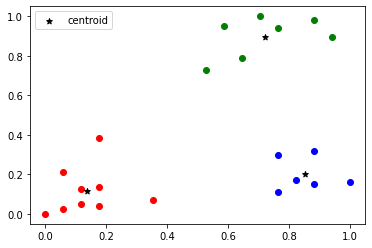

In [173]:
df1=df[df.New_Cluster==0]
df2=df[df.New_Cluster==1]
df3=df[df.New_Cluster==2]

plt.scatter(df1["Age"],df1["Income"],color="red")
plt.scatter(df2["Age"],df2["Income"],color="green")
plt.scatter(df3["Age"],df3["Income"],color="blue")
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],color="black",marker="*",label="centroid")

plt.legend()

In [174]:
krng=range(1,10)
sse=[]
for k in krng:
    km=KMeans(n_clusters=k)
    km.fit(df[["Age","Income"]])
    sse.append(km.inertia_)
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.27558255687229766,
 0.22020960864009398,
 0.17299621932455464,
 0.13265419827245162,
 0.10919063774844094]

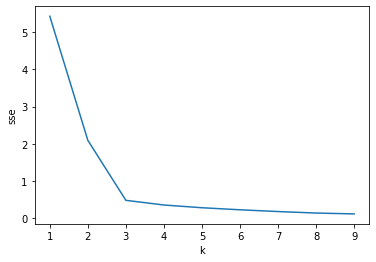

In [175]:
plt.xlabel("k")
plt.ylabel("sse")
plt.plot(krng,sse)